## Estudo de Caso - Concessão de Crédito

Uma Fintech de Crédito iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de 1.000 clientes após 1 ano. 
Com base dessa amostra, serão verificados quais são fatores de risco dos clientes, de forma a conseguir aprovar mais contratos com a menor inadimplência possível.

### Objetivo
O objetivo deste estudo de caso é verificar quais foram os insights obtidos com a realização dessas análises. Além disso, verificar quais fatores de risco estão mais associados à inadimplência.

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
!pip install -q category_encoders

In [4]:
!pip install -q plotly

In [5]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Carregando os dados

In [6]:
df = pd.read_excel('C:/Python/Projetos/Projeto_Creditos/Base_Inadimplencia.xlsx', sheet_name='Base')

In [7]:
df.shape

(1000, 9)

In [8]:
df.columns

Index(['Idade', 'Sexo', 'Escolaridade', 'Tipo_Moradia', 'Saldo_Investimento',
       'Saldo_Conta_Corrente', 'Valor_Emprestimo', 'Duracao_Emprestimo',
       'Inadimplencia'],
      dtype='object')

In [9]:
df.head()

,Idade,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


### Análise Exploratória dos Dados

In [11]:
df.isna().sum()

Idade                   0
Sexo                    0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Inadimplencia           0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# Análise das variáveis categóricas
df.describe(include = object)

,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente
count,1000,1000,1000,1000,1000
unique,2,3,3,4,4
top,M,Graduacao,Propria,Pouco,Sem conta
freq,690,630,713,603,394


In [14]:
# Análise das variáveis numéricas
df.describe().drop(columns = ['Inadimplencia'])

,Idade,Valor_Emprestimo,Duracao_Emprestimo
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


A média de **Idade** da base de dados é de 36 anos. O **Valor de Empréstimo** em média é 3.271 e mediana de 2.319. O **Prazo** médio para pagamento é 21 meses, mediana 18 meses e std 12 meses, ou seja, o prazo de pagamento apresenta pouca variabilidade.

#### Visualização das Variáveis Categóricas

In [15]:
list(df.columns.values)[1:6]

['Sexo',
 'Escolaridade',
 'Tipo_Moradia',
 'Saldo_Investimento',
 'Saldo_Conta_Corrente']

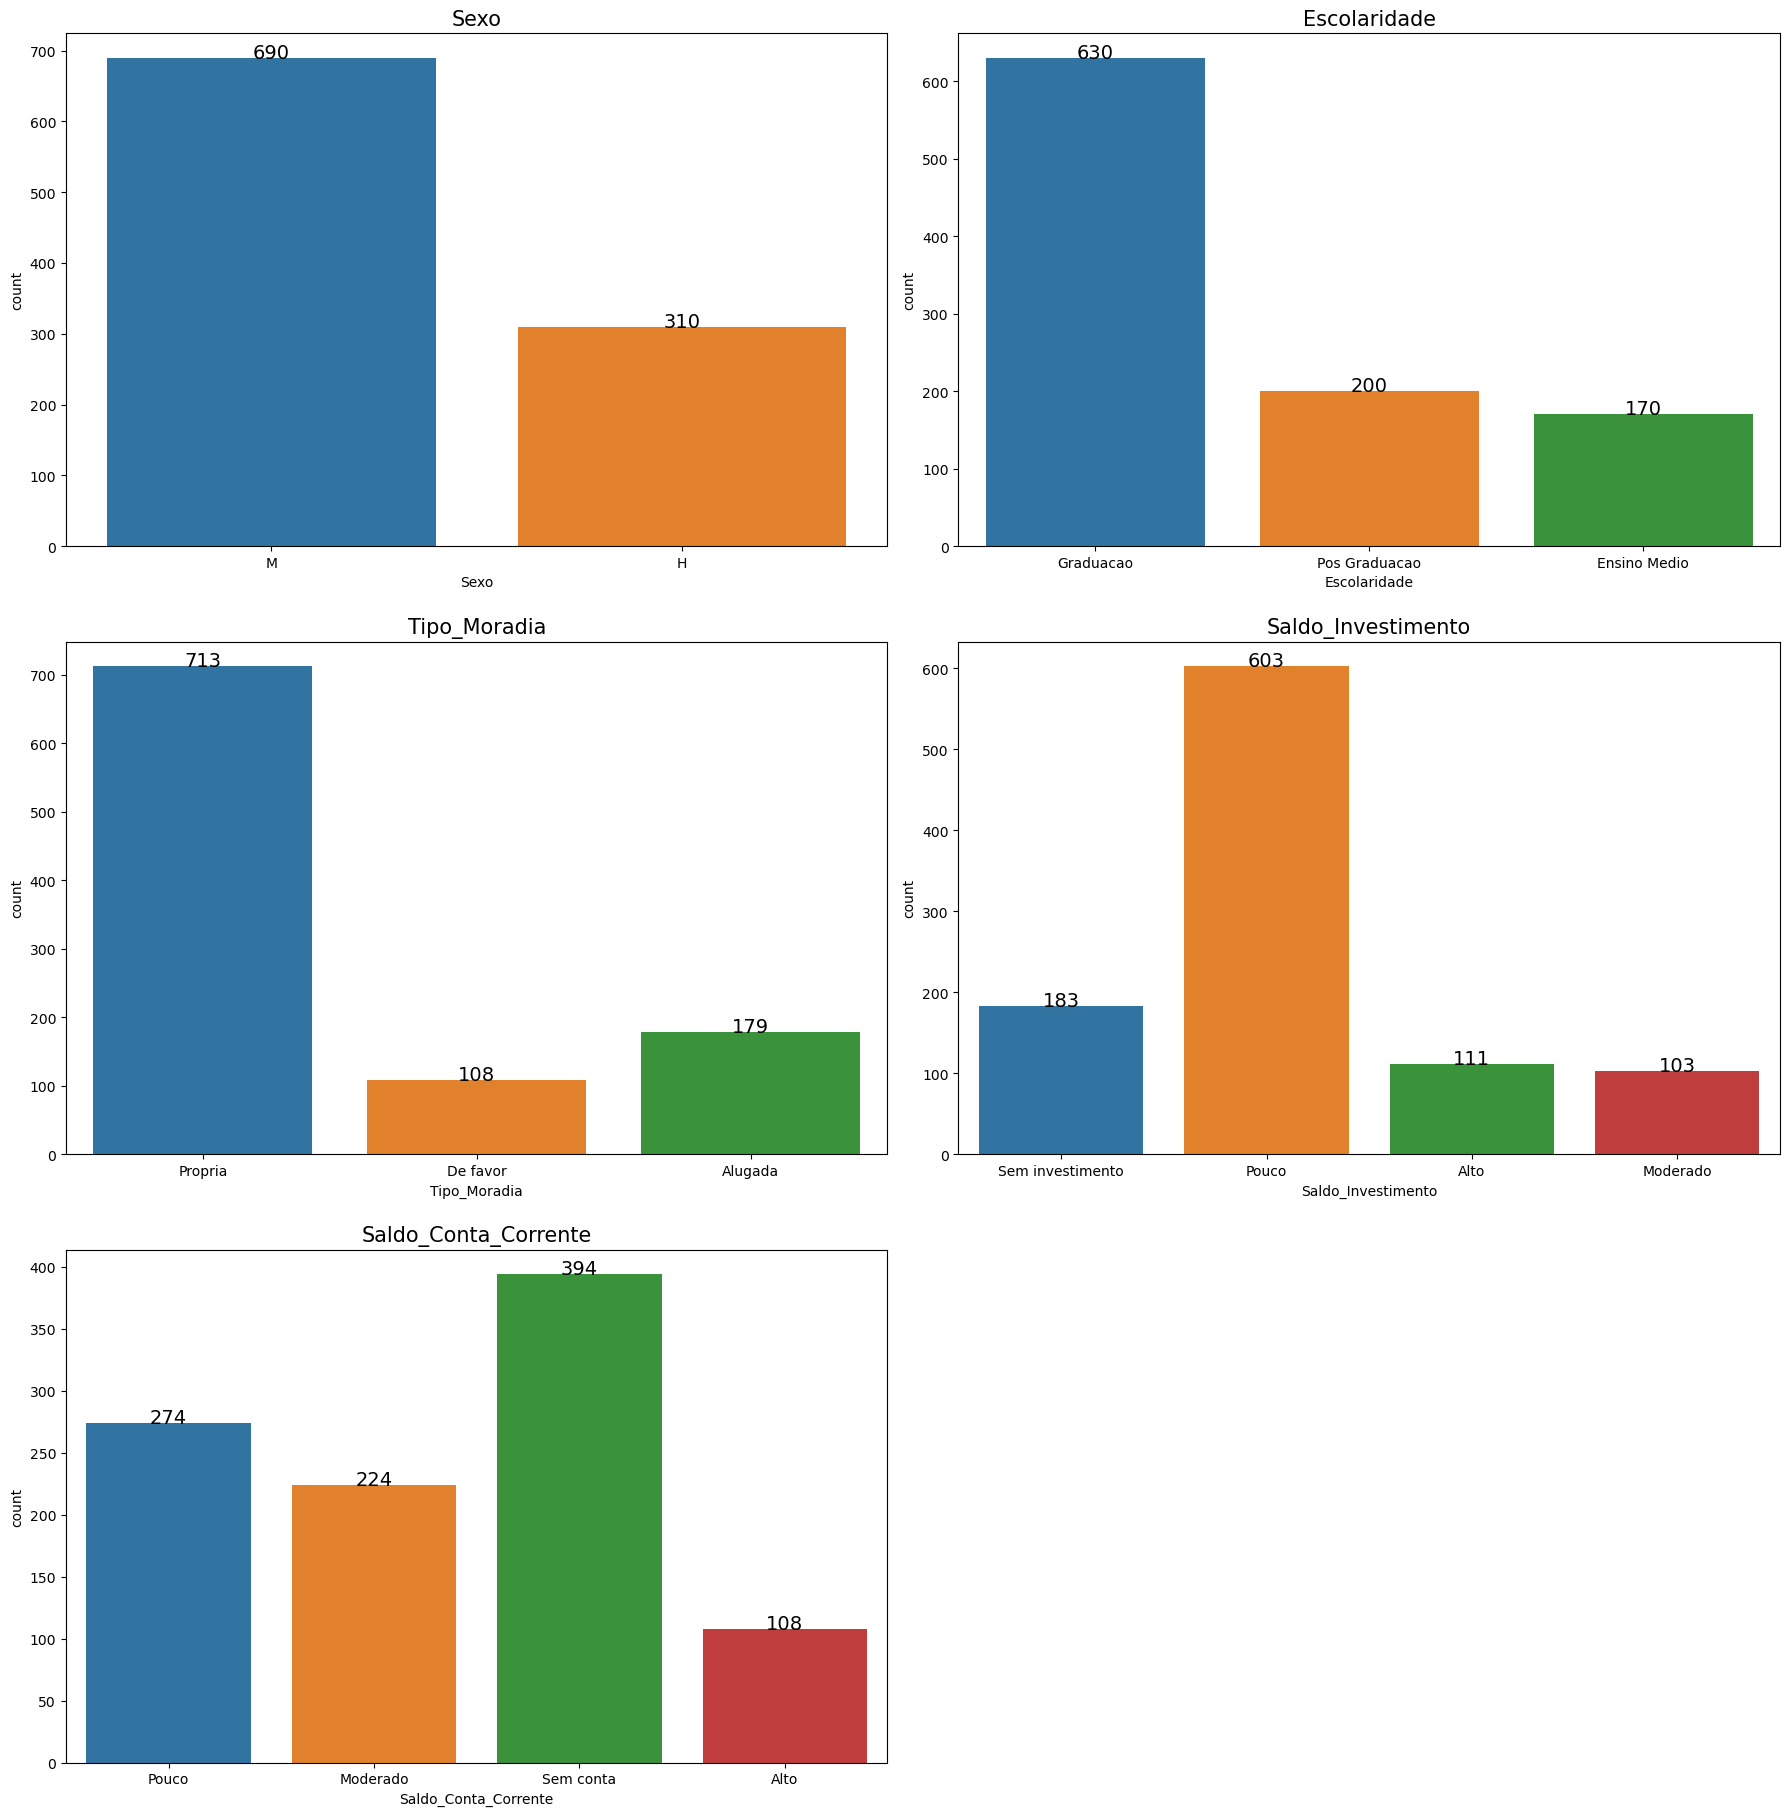

In [16]:
plt.figure(figsize = (18,30))

column_list = list(df.columns.values)[1:6]

# Contador
A = 0

for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 14)
    if A >=7:
        plt.xticks(rotation = 45)
        
plt.tight_layout(h_pad = 2)

#### Visualização das Variáveis Numéricas

In [17]:
df.describe().drop(columns = ['Inadimplencia'])

,Idade,Valor_Emprestimo,Duracao_Emprestimo
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


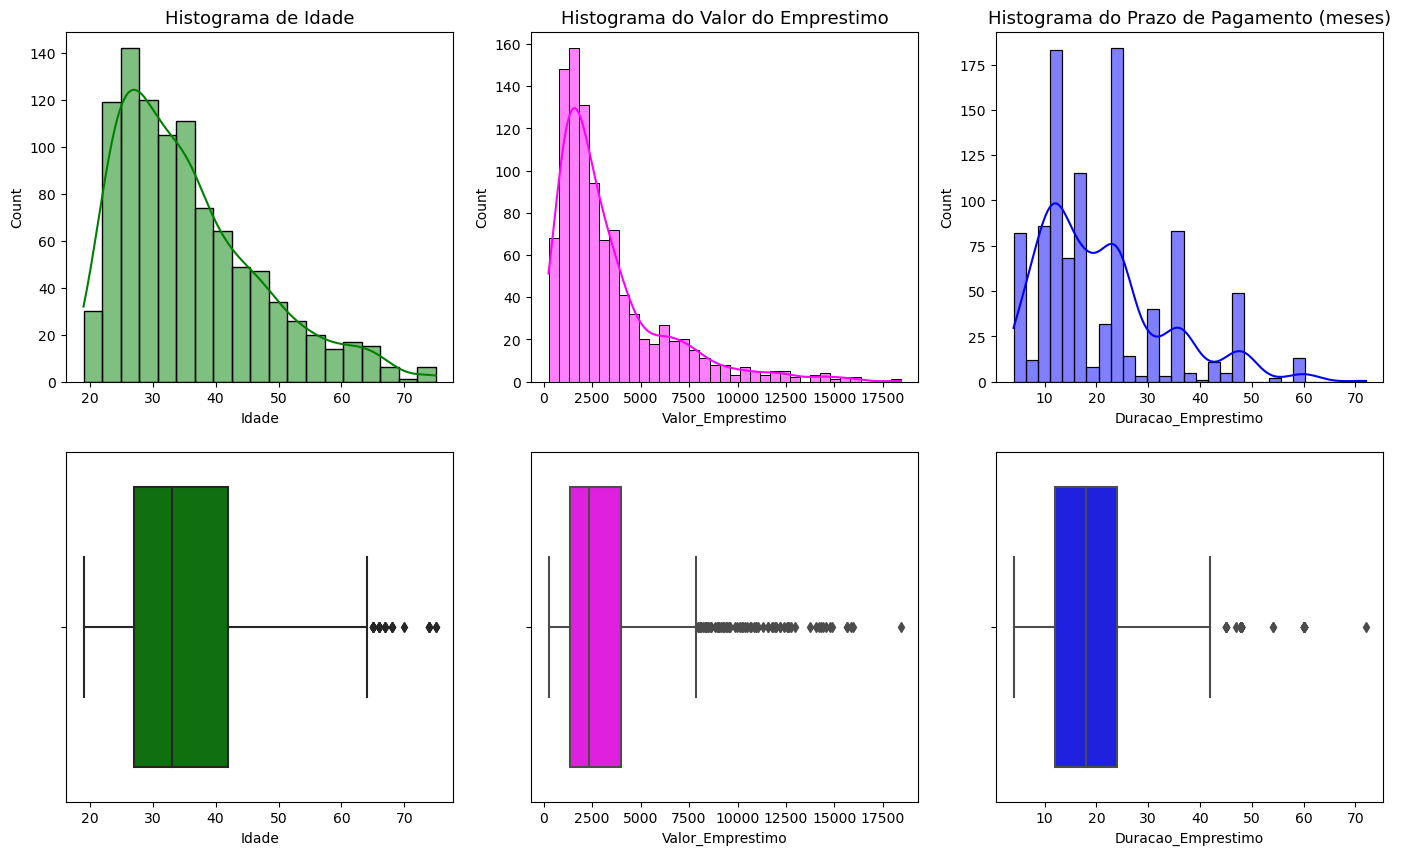

In [18]:
plt.figure(figsize = (17,10))

# Subplots com histogramas
plt.subplot(231)
sns.color_palette("hls", 8)
sns.histplot(df['Idade'], kde = True, color = "green")
plt.title('Histograma de Idade', fontsize = 13)

plt.subplot(232)
sns.histplot(df['Valor_Emprestimo'], kde = True, color = "magenta")
plt.title('Histograma do Valor do Emprestimo', fontsize = 13)

plt.subplot(233)
sns.histplot(df['Duracao_Emprestimo'], kde = True, color = "blue")
plt.title('Histograma do Prazo de Pagamento (meses)', fontsize = 13)

# Subplots com boxplots
plt.subplot(234)
sns.boxplot(df['Idade'], color = "green")

plt.subplot(235)
sns.boxplot(df['Valor_Emprestimo'], color = "magenta")

plt.subplot(236)
sns.boxplot(df['Duracao_Emprestimo'], color = "blue")

plt.show()

In [19]:
# Teste de Normalidade de Distribuição

numerical_feature = ['Idade', 'Valor_Emprestimo', 'Duracao_Emprestimo']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

Idade : Distribuição Não Normal
Valor_Emprestimo : Distribuição Não Normal
Duracao_Emprestimo : Distribuição Não Normal


### Correlação dos Dados

O **Coeficiente de Correlação de Person** varia entre -1 e +1 e indica:

* Correlação positiva forte: coeficiente próximo a 1
* Correlação inexistente: coeficiente próximo a 0
* Correlação negativa forte: coeficiente próximo a -1

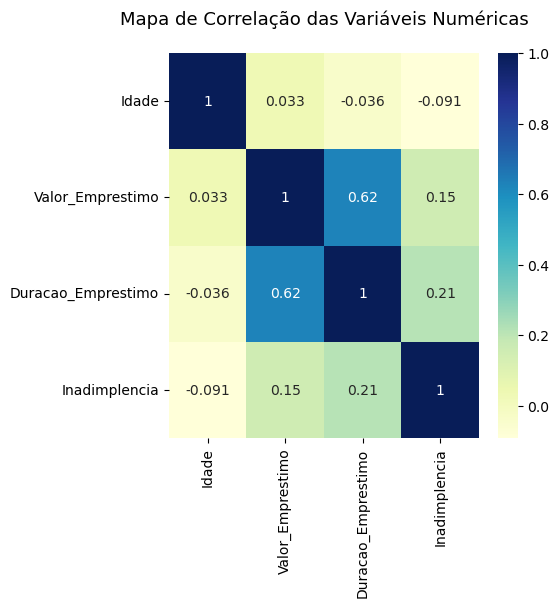

In [20]:
# Heatmap

plt.figure(figsize = (5,5))
sns.heatmap(df.corr(method="pearson"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 13)
plt.show()

De acordo com a Correlação de Pearson, as variáveis 'valor_emprestimo' e 'duracao_emprestimo' têm correlação positiva forte (0,62).  
As variável alvo (inadimplência) e as variáveis 'valor_emprestimo' e 'duracao_emprestimo' apresentam correlação fraca.  
As demais variáveis apresentam correlação próxima a zero e poderiam ser descartadas.